In [1]:
import pandas as pd
import movingpandas as mpd
from datetime import datetime, timedelta

from model import ShipModel

ports = [(30,30),(70,50),(10,70),(60,20)]
model = ShipModel(ports=ports, population=15)
len(model.agents)

/home/anita/miniforge3/envs/mesa/lib/python3.13/site-packages/movingpandas/__init__.py:37: UserWarning: Missing optional dependencies. To use the trajectory smoother classes please install Stone Soup (see https://stonesoup.readthedocs.io/en/latest/#installation).
  warnings.warn(e.msg, UserWarning)


15

In [2]:
for t in range(100):
    model.step()

In [3]:
agent_df = model.datacollector.get_agent_vars_dataframe()
agent_df

pos
Step AgentID                                         
0    1                                       [70, 50]
     2                                       [70, 50]
     3                                       [30, 30]
     4                                       [10, 70]
     5                                       [70, 50]
...                                               ...
100  11                                      [10, 70]
     12                                      [30, 30]
     13                                      [60, 20]
     14       [65.64000475116785, 51.311606614646045]
     15                                      [10, 70]

[1515 rows x 1 columns]

In [4]:
df = agent_df.reset_index()
df[['x', 'y']] = pd.DataFrame(df['pos'].tolist(), index=df.index)
df = df.drop(columns=['pos'])
df

,Step,AgentID,x,y
0,0,1,70.000000,50.000000
1,0,2,70.000000,50.000000
2,0,3,30.000000,30.000000
3,0,4,10.000000,70.000000
4,0,5,70.000000,50.000000
...,...,...,...,...
1510,100,11,10.000000,70.000000
1511,100,12,30.000000,30.000000
1512,100,13,60.000000,20.000000
1513,100,14,65.640005,51.311607


In [5]:
start_datetime = datetime.now()
df["t"] = df["Step"].apply(lambda step: start_datetime + timedelta(seconds=step))

In [6]:
tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y')

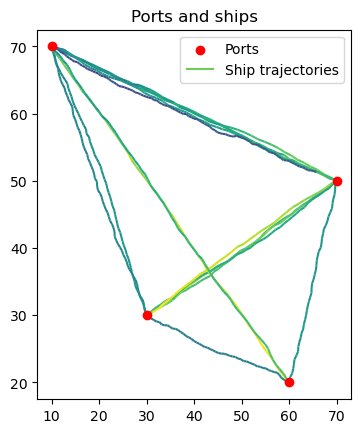

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


# Add ports
ports = [(30, 30), (70, 50), (10, 70), (60, 20)]
x_coords, y_coords = zip(*ports)
ax.scatter(x_coords, y_coords, color='red', label='Ports', zorder=5)
tc.plot(ax=ax, label='Ship trajectories', column='speed')

# Labels and legend
ax.legend()
ax.set_title("Ports and ships")

plt.show()